In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit

In [2]:
fname='data/paddle3_test_run/eDeposit.txt'

In [99]:
f=open(fname,'r')
l=f.readline()
eid=[]
energy=[]
while l:
    items=l[:-1].split(',')
    eid.append(int(items[0]))
    energy.append(float(items[1]))
    l=f.readline()
eid=np.array(eid)
energy=np.array(energy)

In [111]:
ename='paddle3_test_run'

in here
[4, 67] [2154.0, 1486.0]


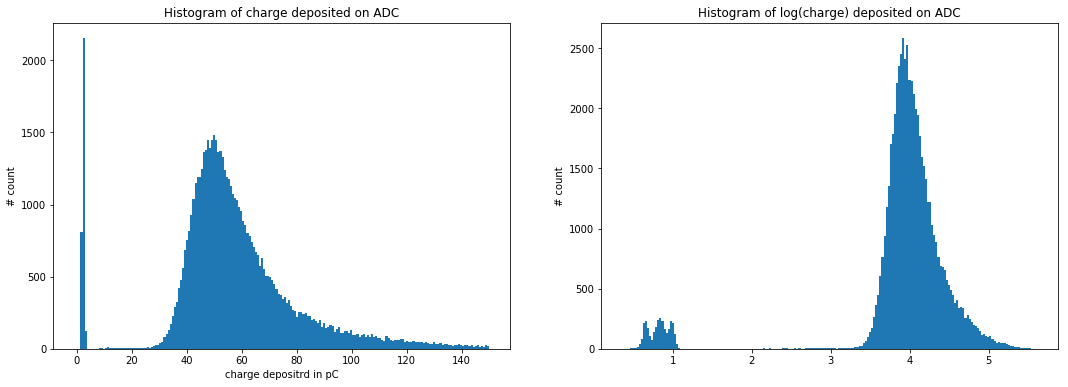

In [115]:
f,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,6))
x=ax[0].hist(energy,bins=200,range=(-1,150))
xl=ax[1].hist(np.log(energy),bins=200)
ax[0].set_title("Histogram of charge deposited on ADC")
ax[1].set_title("Histogram of log(charge) deposited on ADC")
ax[0].set_xlabel("charge depositrd in pC")
ax[0].set_ylabel("# count")
ax[1].set_ylabel("# count")
xhere=(x[1][:-1]+x[1][1:])/2
yhere=x[0]
pk,pkv=find_peak(yhere,20)
print(pk,pkv)
plt.savefig('data/'+ename+'/'+'hist.png',dpi=400)
f=open('data/'+ename+'/'+'peaks.txt','w')
f.write("#peaks \n#energy,count\n")
for i,j in zip(pk,pkv):
    f.write(str(xhere[i])+","+str(j)+'\n')
f.close()

In [45]:
def diGuss(x,a1,mu1,s1,a2,mu2,s2):
    return a1*np.exp(-((x-mu1)/(s1))**2 /2) +a2*np.exp(-((x-mu2)/(s2))**2 /2)

def sGuss(x,a1,mu1,s1):
    return a1*np.exp(-((x-mu1)/(s1))**2 /2)

In [34]:
xhere=(x[1][:-1]+x[1][1:])/2
yhere=x[0]
print(np.shape(xhere),np.shape(yhere))

(200,) (200,)


In [52]:
a=[10,20,30]

In [53]:
a[0:2]

[10, 20]

In [88]:
def find_peak(array,window=10):
    wb2=int(window/2)+1
    n=len(array)-wb2
    peaks=[]
    peak_vals=[]
    for i in range(wb2):
        m=np.amax(array[0:window])
        if (m==array[i]):
            peaks.append(i)
            peak_vals.append(array[i])
    i+=1
    while i<n-wb2:
#         print(array[i-wb2],array[i+wb2])
        m=np.amax(array[i-wb2:i+wb2])
        if (m==array[i]):
            print("in here")
            peaks.append(i)
            peak_vals.append(array[i])
            i+=1
            continue
        i+=1
    return peaks,peak_vals

in here
in here
[50, 150] [1.0, 1.0]


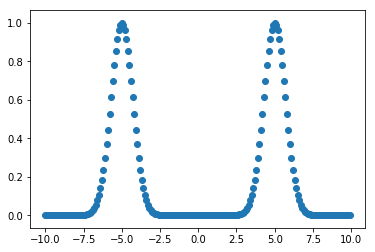

In [89]:
a=np.arange(-10,10,0.1)
b=np.exp(-(a-5)**2)+np.exp(-(a+5)**2)
plt.scatter(a,b)
pk,pkv=find_peak(b)
print(pk,pkv)

in here
[4, 67] [2154.0, 1486.0]


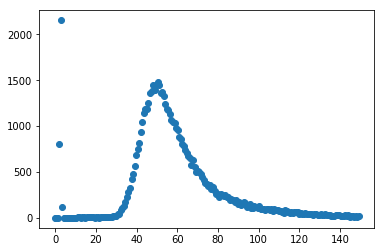

In [109]:
a=xhere
b=yhere
plt.scatter(a,b)
pk,pkv=find_peak(yhere,20)
print(pk,pkv)

(199,) (199,)


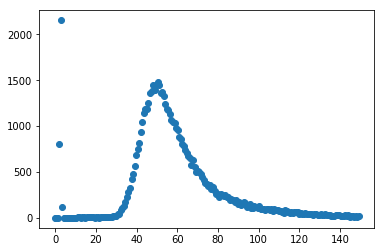

In [85]:
xhere=(x[1][:-2]+x[1][1:-1]+x[1][2:])/3
yhere=x[0][:-1]
print(np.shape(xhere),np.shape(yhere))
plt.scatter(xhere,yhere)

In [46]:
from scipy.signal import find_peaks

mu1 =  66.41298056281384  +/-  7.311440899061315
sig1 =  16.301129469829565  +/-  3.526459273239385


/home/hcal/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


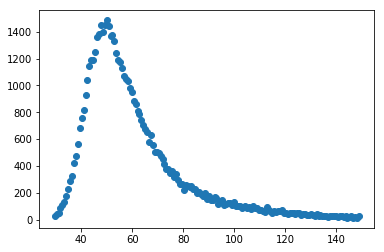

In [44]:
start=40
end=-1
plt.scatter(xhere[start:end],yhere[start:end])
it_paramsA,covB=curve_fit(sGuss,xhere[start:end],yhere[start:end])
idx=1
print("mu1 = ",fit_params[idx]," +/- ",np.sqrt(cov[idx][idx]))
idx=2
print("sig1 = ",fit_params[idx]," +/- ",np.sqrt(cov[idx][idx]))

In [40]:
start=0
end=-1
it_paramsA,covB=curve_fit(diGuss,xhere[start:end],yhere[start:end])

In [38]:
idx=1
print("mu1 = ",fit_params[idx]," +/- ",np.sqrt(cov[idx][idx]))
idx=2
print("sig1 = ",fit_params[idx]," +/- ",np.sqrt(cov[idx][idx]))
idx=4
print("mu2 = ",fit_params[idx]," +/- ",np.sqrt(cov[idx][idx]))
idx=5
print("sig2 = ",fit_params[idx]," +/- ",np.sqrt(cov[idx][idx]))

mu1 =  66.41298056281384  +/-  7.311440899061315
sig1 =  16.301129469829565  +/-  3.526459273239385
mu2 =  49.21158661529126  +/-  0.5111827763995939
sig2 =  -7.855767997954725  +/-  0.9675488345264115


In [115]:
f=open('data.txt','r')
l=f.readline()
timeA,wvA=[],[]
energy=[]
eid=0;
while l:
    try:
        if "#Event" in l:
            l=f.readline()
            continue
        if '!energy' in l:
            eid+=1;
            item=l[:-1].split(",")
            energy.append(float(item[1]))
            if(eid%2000==0):
                print(eid,"  :  ",energy[-1])
            l=f.readline()
            continue
        if "#Waveform" in l:
            timeA.append([[],[],[],[]])
            wvA.append([[],[],[],[]])
            l=f.readline()
            continue
        
        item=l[:-1].split(",")
        for j in range(4)  :
#             print("here",timeA[-1][j])
            timeA[-1][j].append(float(item[2*j]))
            wvA[-1][j].append(float(item[2*j+1]))
        l=f.readline()
    except:
        print("err : ",l)
        break
f.close()
energy=np.array(energy)
wvA=np.array(wvA)
timeA=np.array(timeA)

2000   :   -33.36393
4000   :   -51.208412
6000   :   -2.497697
8000   :   -34.353639
10000   :   -39.521793
12000   :   -23.698071
14000   :   -74.805899
16000   :   -40.796317
18000   :   -2.538209
20000   :   -39.56788
22000   :   -31.920926
24000   :   -47.202046
26000   :   -46.910279


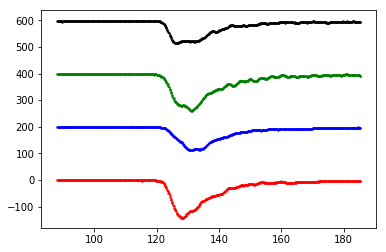

In [116]:
n=0
col=['r','b','g','k']
for j in range(4):
#     if j==2: 
#         continue
    plt.scatter(timeA[n][j],wvA[n][j]+200*j,s=2,c=col[j])

In [118]:
np.sum(wvA[n][chid][start:end])

0.0

-38.727142


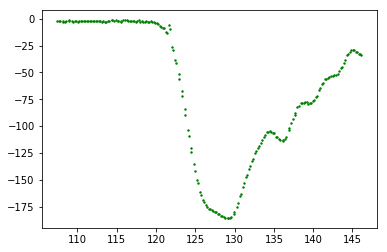

In [120]:
plt.figure()
n=3
start=100
end=300
chid=2
plt.scatter(timeA[n][chid][start:end],wvA[n][chid][start:end],s=2,c=col[chid])
print(timeA[n][chid][start]-timeA[n][chid][end-1])

In [121]:
for n in range(5.2):
    plt.figure()
    for j in range(4):
#         if j==2:
#             continue
#         print(n,j)
        plt.scatter(timeA[n][j],wvA[n][j],s=2,c=col[j])

TypeError: 'float' object cannot be interpreted as an integer

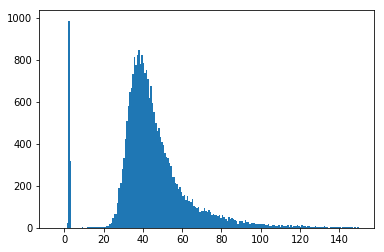

In [127]:
x=plt.hist(-1*energy,bins=200,range=(-5,150))